# Part I - (Prosper Loan Data Analysis)
## by (Selasi Ayittah Randy)

## Preliminary Wrangling

The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')
loan_data = loan.copy()

In [4]:
# high-level overview of data shape and composition
print(loan_data.shape)
print(loan_data.dtypes)
print(loan_data.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [5]:
#Convert the PropserRating columnt to an ordered category type
rating_order = ['HR','E','D','C','B','A','AA']
order = [12,36,60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
ordered_var_term = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order)
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].astype(ordered_var)
loan_data['Term'] = loan_data['Term'].astype(ordered_var_term)


In [6]:
# descriptive statistics for numeric variables
print(loan_data.describe())

       ListingNumber    BorrowerAPR   BorrowerRate    LenderYield  \
count   1.139370e+05  113912.000000  113937.000000  113937.000000   
mean    6.278857e+05       0.218828       0.192764       0.182701   
std     3.280762e+05       0.080364       0.074818       0.074516   
min     4.000000e+00       0.006530       0.000000      -0.010000   
25%     4.009190e+05       0.156290       0.134000       0.124200   
50%     6.005540e+05       0.209760       0.184000       0.173000   
75%     8.926340e+05       0.283810       0.250000       0.240000   
max     1.255725e+06       0.512290       0.497500       0.492500   

       EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count             84853.000000   84853.000000     84853.000000   
mean                  0.168661       0.080306         0.096068   
std                   0.068467       0.046764         0.030403   
min                  -0.182700       0.004900        -0.182700   
25%                   0.115670       0.042400   

In [7]:
### Check null values
loan_data.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### What is the structure of your dataset?

> The dataset comprises of 113937 rows  and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out whuch features are best for predicting the Borrower APR for a loan


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the larger the loan the lower the APR and bprrowers with higher stated monthly income will have higher loan amount



In [8]:
#Selecting columns of Interest
selected_columns = ['LoanOriginalAmount', 'BorrowerAPR',"ProsperScore", 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','LoanStatus']

In [9]:
loan_df =loan_data[selected_columns]


In [10]:
### Check for sum of null values in the selected column
loan_df.isnull().sum()

LoanOriginalAmount           0
BorrowerAPR                 25
ProsperScore             29084
StatedMonthlyIncome          0
Term                         0
ProsperRating (Alpha)    29084
EmploymentStatus          2255
LoanStatus                   0
dtype: int64

In [11]:
### Drop rows with no APR
loan_df=loan_df.dropna(subset="BorrowerAPR")

In [12]:
loan_df.isnull().sum()

LoanOriginalAmount           0
BorrowerAPR                  0
ProsperScore             29059
StatedMonthlyIncome          0
Term                         0
ProsperRating (Alpha)    29059
EmploymentStatus          2230
LoanStatus                   0
dtype: int64

In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanOriginalAmount     113912 non-null  int64   
 1   BorrowerAPR            113912 non-null  float64 
 2   ProsperScore           84853 non-null   float64 
 3   StatedMonthlyIncome    113912 non-null  float64 
 4   Term                   113912 non-null  category
 5   ProsperRating (Alpha)  84853 non-null   category
 6   EmploymentStatus       111682 non-null  object  
 7   LoanStatus             113912 non-null  object  
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 6.3+ MB


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: BorrowerAPR.

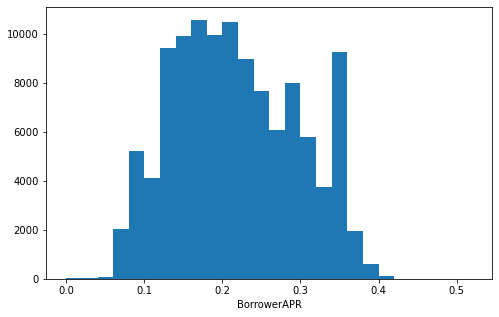

In [14]:
# start with a standard-scaled plot
binsize = 0.02
bins = np.arange(0, loan_df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.show()

- Most loans have an APR less than 0.43.
- Few loans have an APR greater than 0.43

In [15]:
# Check loans with an APR greater than 0.43
loan_df[loan_df.BorrowerAPR>0.43]

,LoanOriginalAmount,BorrowerAPR,ProsperScore,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus
18326,3000,0.45857,NaN,10000.000000,36,NaN,NaN,Defaulted
22195,1789,0.46201,NaN,2916.666667,36,NaN,NaN,Chargedoff
36018,1500,0.51229,NaN,2838.000000,36,NaN,NaN,Completed
56761,3000,0.50633,NaN,0.000000,36,NaN,NaN,Defaulted
82043,3000,0.48873,NaN,1583.333333,36,NaN,NaN,Defaulted
103973,2800,0.45857,NaN,3750.000000,36,NaN,NaN,Defaulted


- Loans with APR greater than 0.43 have no Prosper Score and ProsperRating

In [16]:
#Drop rows with APR greater than 0.43
loan_df=loan_df[loan_df.BorrowerAPR<0.43]

In [17]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113906 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanOriginalAmount     113906 non-null  int64   
 1   BorrowerAPR            113906 non-null  float64 
 2   ProsperScore           84853 non-null   float64 
 3   StatedMonthlyIncome    113906 non-null  float64 
 4   Term                   113906 non-null  category
 5   ProsperRating (Alpha)  84853 non-null   category
 6   EmploymentStatus       111682 non-null  object  
 7   LoanStatus             113906 non-null  object  
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 6.3+ MB


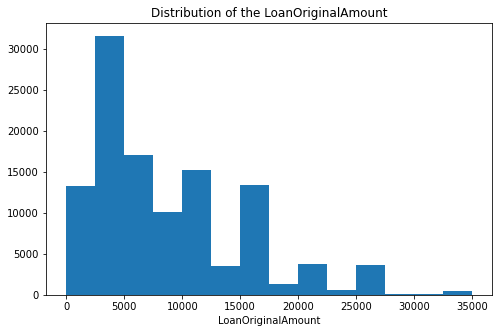

In [18]:
#Distribution of the Loan Original Amount
binsize = 2500
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.title('Distribution of the LoanOriginalAmount')

plt.show()

The distribution of the Loan Original Amount is right skewed with most borrowers given amount less than 20k

In [19]:
loan_df['StatedMonthlyIncome'].describe()

count    1.139060e+05
mean     5.607083e+03
std      7.478484e+03
min      0.000000e+00
25%      3.200000e+03
50%      4.666667e+03
75%      6.817917e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [21]:
loan_df.dtypes

LoanOriginalAmount          int64
BorrowerAPR               float64
ProsperScore              float64
StatedMonthlyIncome       float64
Term                     category
ProsperRating (Alpha)    category
EmploymentStatus           object
LoanStatus                 object
dtype: object

In [22]:
loan_df.Term.unique()

[36, 60, 12]
Categories (3, int64): [12 < 36 < 60]

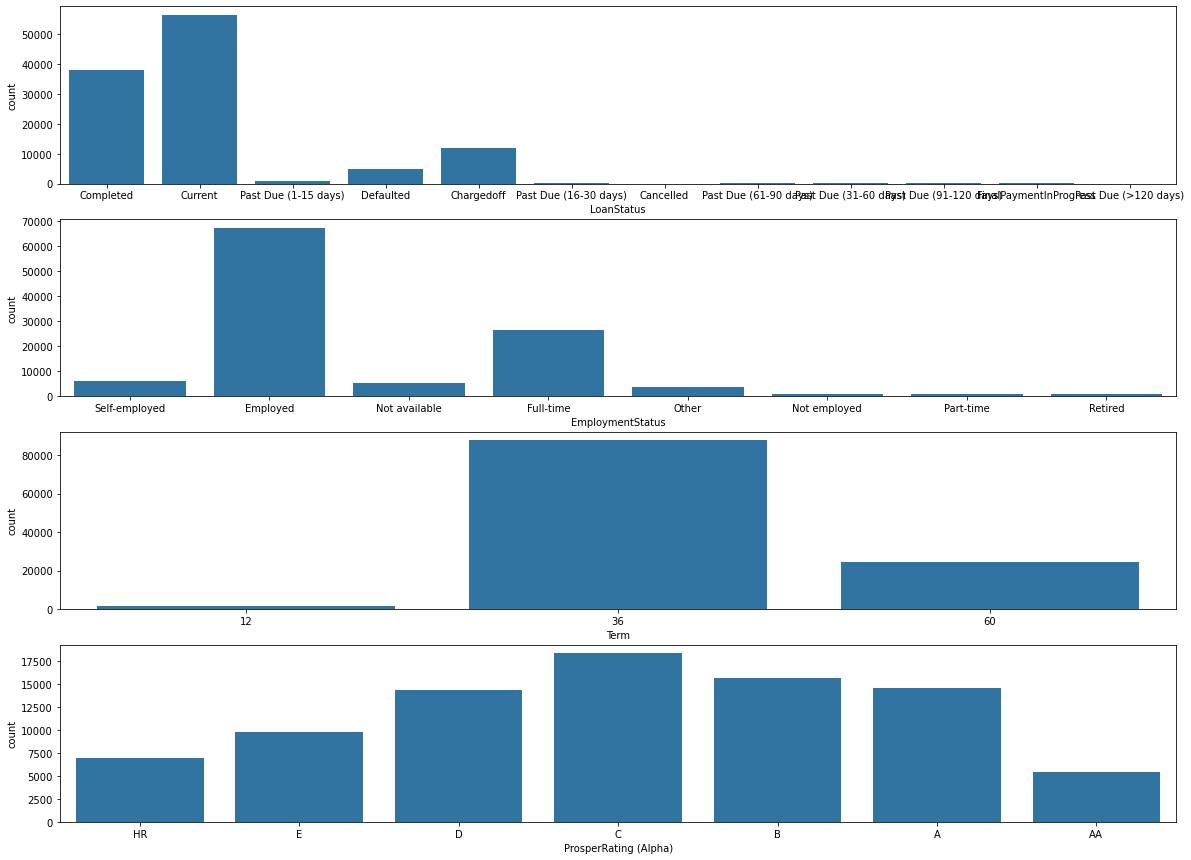

In [23]:
fig, ax = plt.subplots(nrows=4, figsize = [20,15])
default_color = sb.color_palette()[0]

sb.countplot(data = loan_df, x ='LoanStatus', color = default_color, ax = ax[0])
sb.countplot(data = loan_df, x = 'EmploymentStatus', color = default_color, ax = ax[1])
sb.countplot(data = loan_df, x = 'Term', color = default_color, ax = ax[2])
sb.countplot(data = loan_df, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[3])

plt.show()

 - Most borrowers are employed and have loan status as current or completed
 - Majority of the borrowers go for a term of 36 month 
 - Most borrowers have a prosper rating of C followed by B

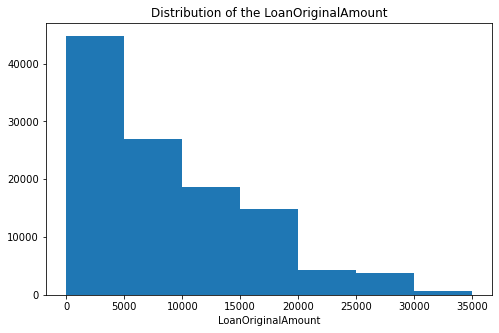

In [29]:
binsize = 5000
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.title('Distribution of the LoanOriginalAmount')

plt.show()

- The distribution of the LoanOriginal Amount is right skewed.
- Majority of the borrowers recieve loans less than 20000


## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [30]:
loan_df.dtypes

LoanOriginalAmount          int64
BorrowerAPR               float64
ProsperScore              float64
StatedMonthlyIncome       float64
Term                     category
ProsperRating (Alpha)    category
EmploymentStatus           object
LoanStatus                 object
dtype: object

In [31]:
numeric_vars = ['StatedMonthlyIncome', 'ProsperScore', 'LoanOriginalAmount', 'BorrowerAPR']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'ProsperRating (Alpha)',"Term"]

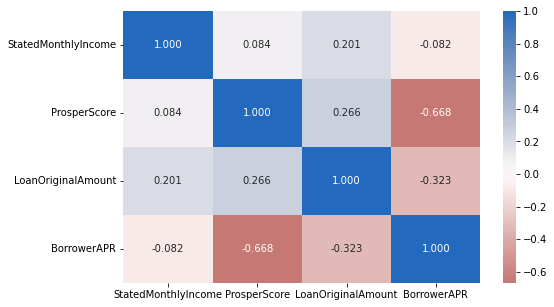

In [32]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

loan_df.shape= (113906, 8)
loan_df.shape= (113906, 8)


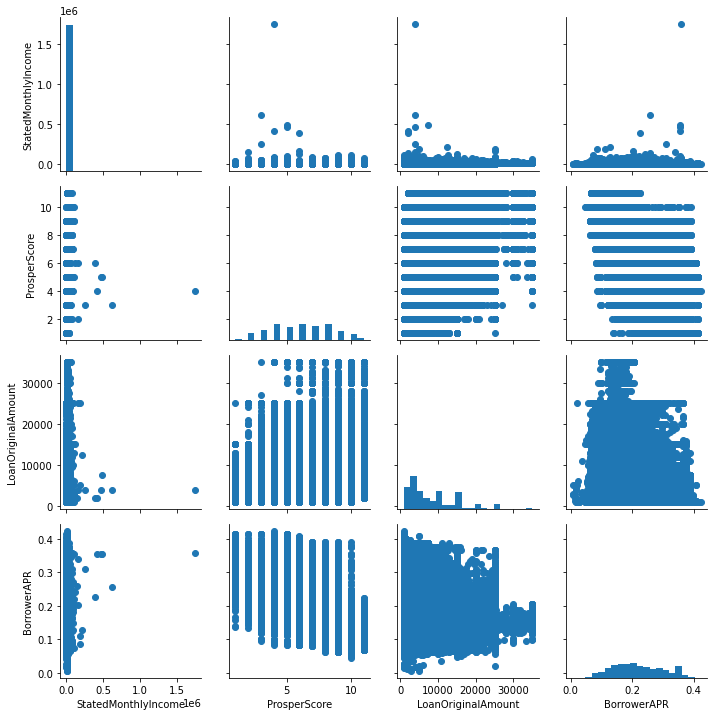

In [33]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
print("loan_df.shape=",loan_df.shape)
diamonds_samp = loan_df.sample(n=500, replace = False)
print("loan_df.shape=",loan_df.shape)

g = sb.PairGrid(data = loan_df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

- From the 2 figures above it can be seen that LoanOriginalAmount,ProsperScore and StatedMonthlyIncome is postiviely corelated with each other.

- LoanOriginalAmount,ProsperScore and StatedMonthlyIncome is negatively correlated with BorrowerAPR

<Figure size 720x720 with 0 Axes>

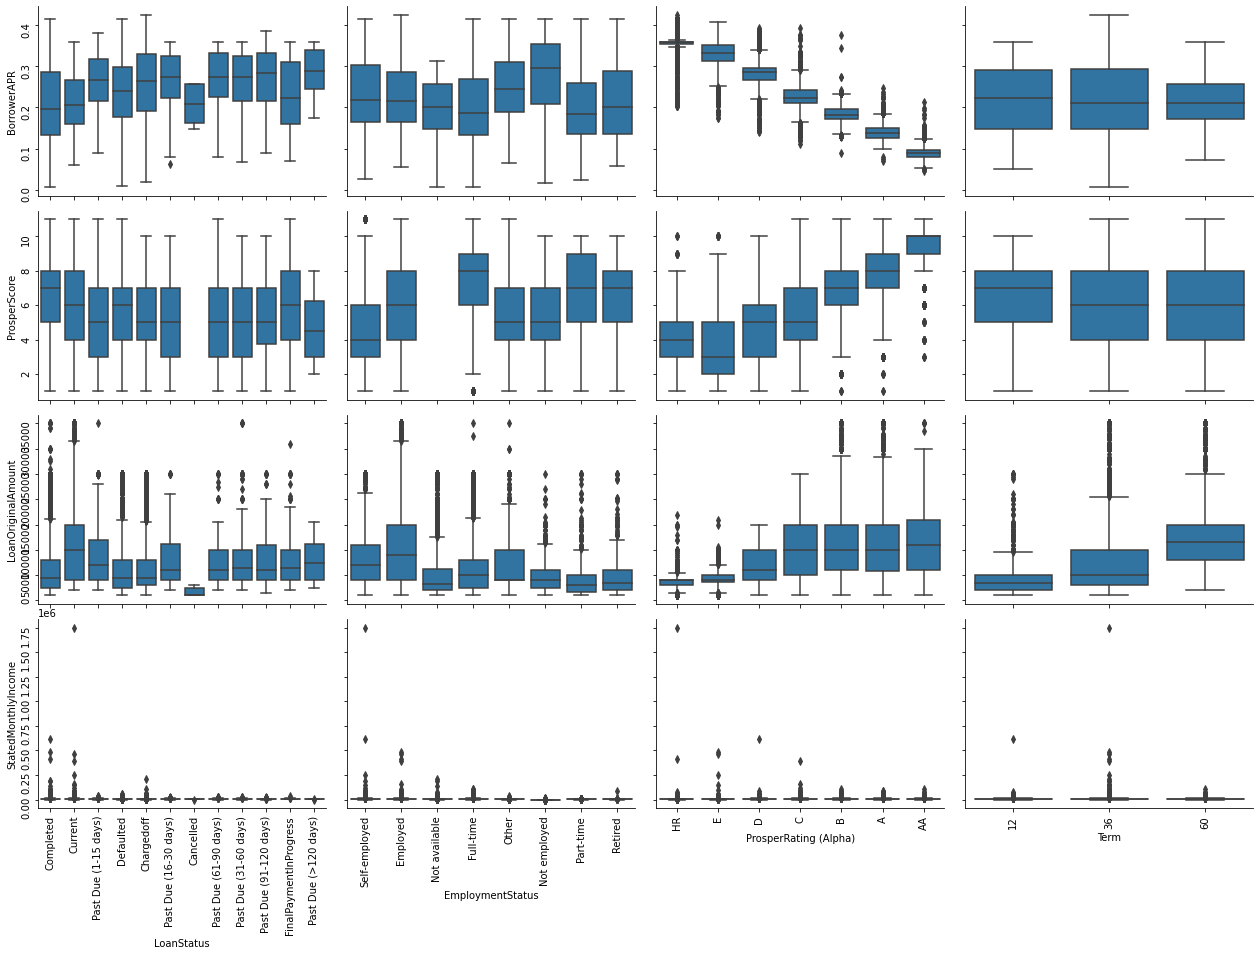

In [34]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
# diamonds_samp = diamonds.loc[samples,:]

loan_df_samp = loan_df.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_df, y_vars = ['BorrowerAPR', 'ProsperScore',"LoanOriginalAmount","StatedMonthlyIncome"], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
for ax in g.axes.flatten():
    ax.tick_params(rotation = 90)
g.map(boxgrid)
plt.show();

From the graph above, it can be deduced that:
- Loan original amount increases with higher ProsperRating(Alpha)
- Loan original amount increases with longer loan term
- Prosper Score increase with higher ProsperRating.
- BorrowerAPR decreases with higher  ProsperRating(Alpha)

In [35]:
loan_df.dtypes

LoanOriginalAmount          int64
BorrowerAPR               float64
ProsperScore              float64
StatedMonthlyIncome       float64
Term                     category
ProsperRating (Alpha)    category
EmploymentStatus           object
LoanStatus                 object
dtype: object

Finally, let's look at relationships between the  categorical features.

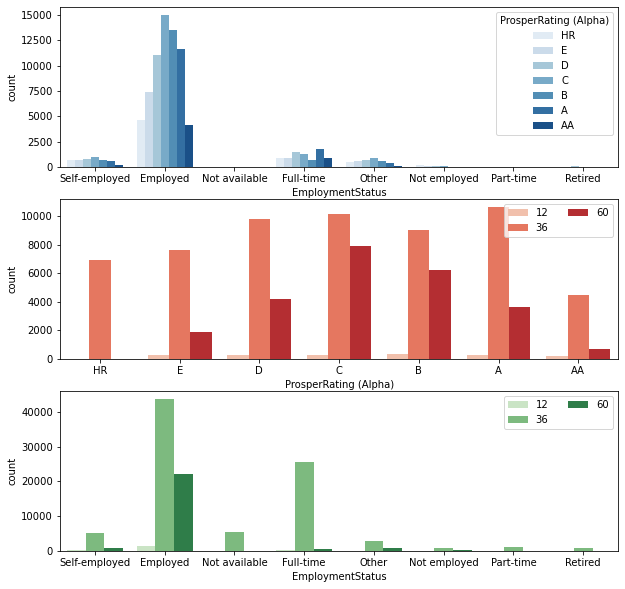

In [36]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 10])

# subplot 1: EmploymentStatus vs ProsperRating (Alpha)
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')

# subplot 2: ProsperRating (Alpha) vs. Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: EmploymentStatus vs. Term
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

From the above diagram, it can be deduced that:
- There are more borrowers who go for 36 term than 12 and 60 term irrespective of their  Prosper rating

### Relationship between LoanOriginalAmount and BorrowerAPR

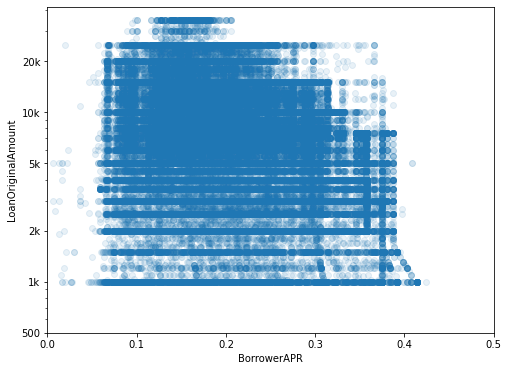

In [38]:

plt.figure(figsize = [8, 6])
plt.scatter(data = loan_df, x = 'BorrowerAPR', y = 'LoanOriginalAmount', alpha = 0.1)
plt.xlim([0, 0.5])
plt.xlabel('BorrowerAPR')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('LoanOriginalAmount')
plt.show()

There is a negative correlation between BorrowerAPR and LoanOriginalAmount that is as the BorrowerAPR decreases, the LoanOriginalAmount increases

## Multivariate Exploration

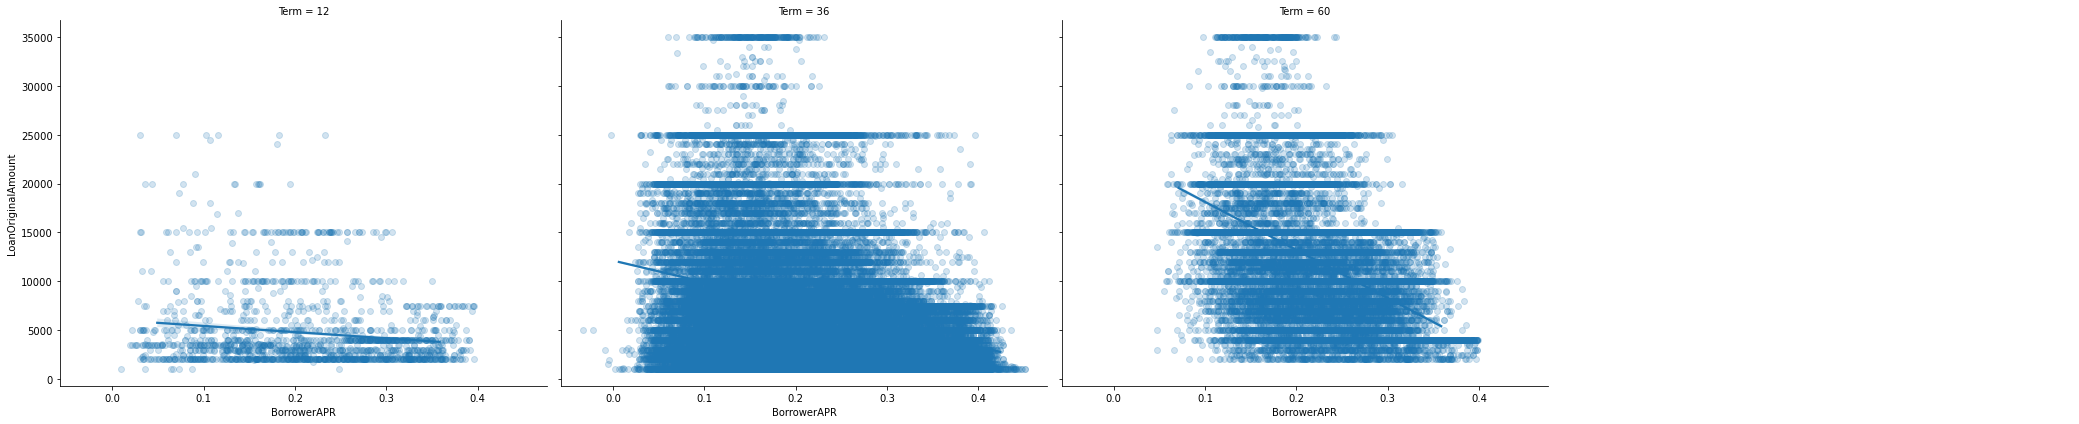

In [45]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_df, aspect=1.2, height=6, col='Term', col_wrap=4)
g.map(sb.regplot, 'BorrowerAPR','LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':0.2});
g.add_legend();

Term have no effect on the reationship between APR and loan amount

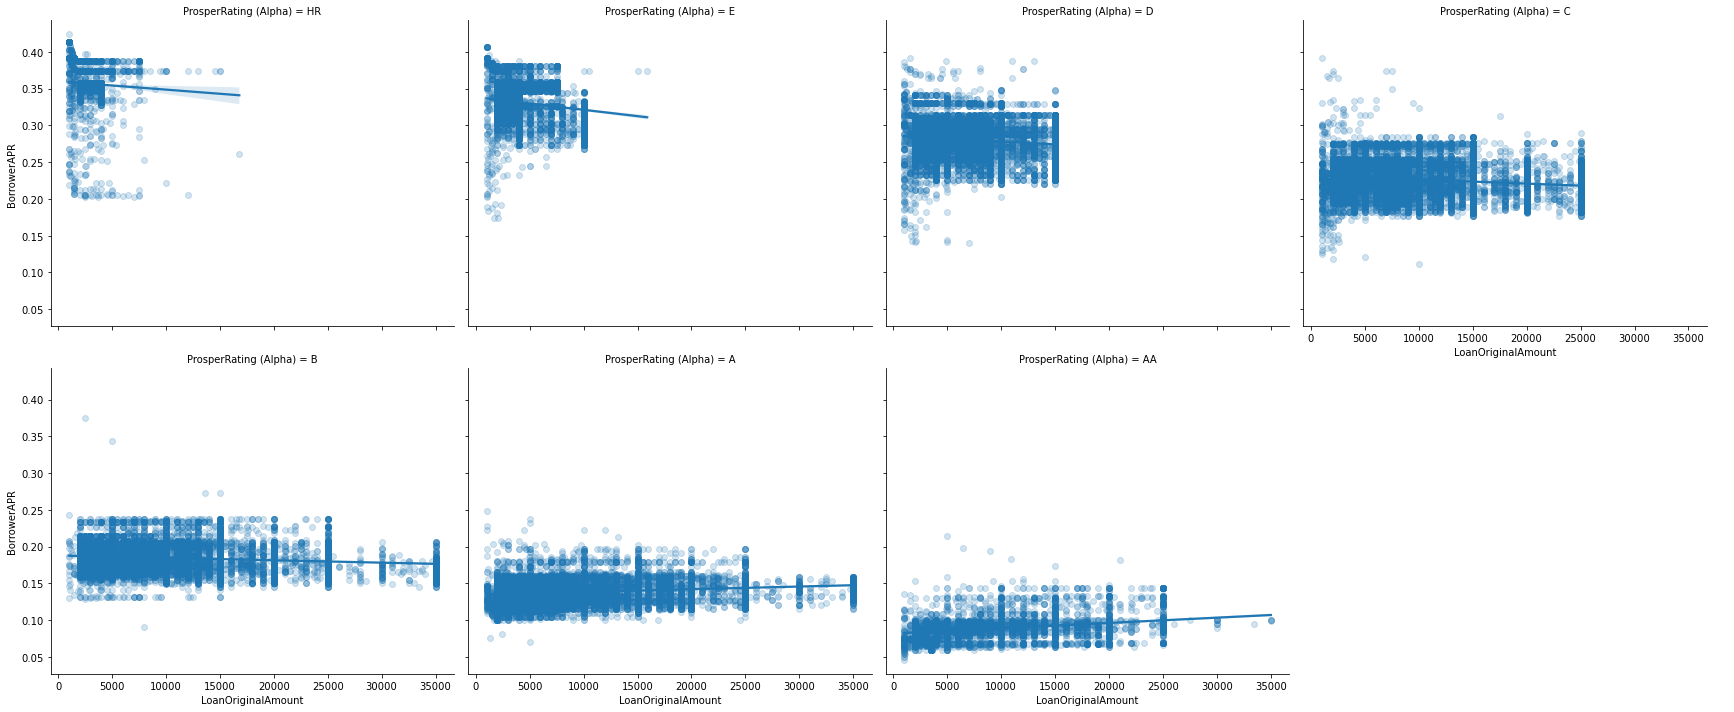

In [47]:
# Prosper Rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_df, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.2});
g.add_legend();

- Prosper Rating  have effect on  relationship of LoanOriginalAmount and BorrowerAPR
- For borrowers with ratting AA, loan original amount increase as borrowerAPR increases

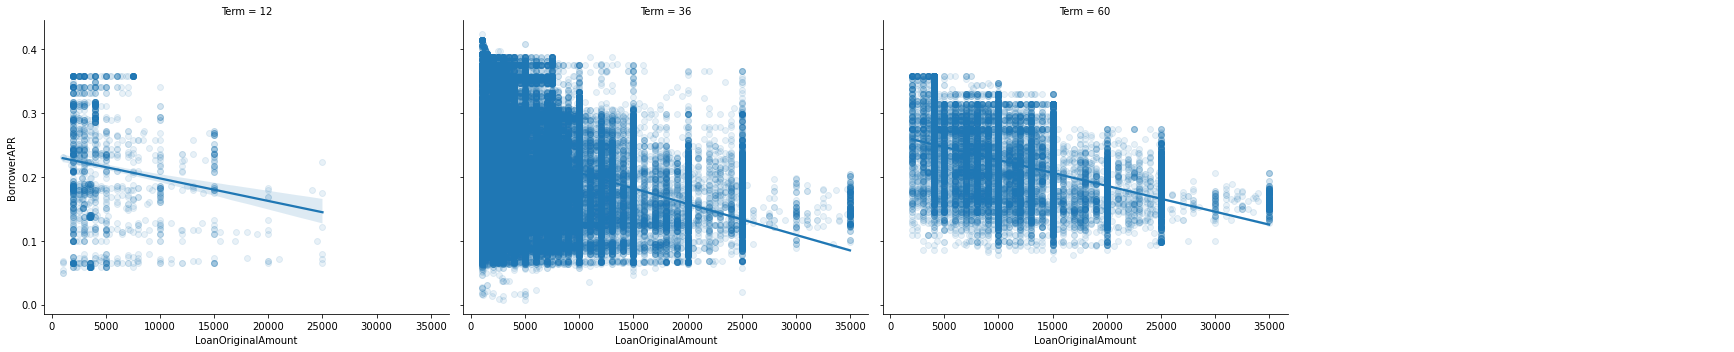

In [49]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Term effect has no relationship on APR and loan amount

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. 

>For the rating and term effects on loans,it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.


### Were there any interesting or surprising interactions between features?

> The borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.